In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

/Users/eternity/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten images (28x28 -> 784) and normalize pixel values to [0, 1]
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

In [3]:
# Create a Sequential model (feedforward neural network)
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer
    layers.Dropout(0.2),  # Regularization to prevent overfitting
    layers.Dense(10, activation='softmax')  # Output layer (10 classes for digits 0-9)
])

/Users/eternity/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model (fixed line - added missing parenthesis)
history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    validation_data=(X_test, y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8610 - loss: 0.4794 - val_accuracy: 0.9593 - val_loss: 0.1413
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9550 - loss: 0.1508 - val_accuracy: 0.9705 - val_loss: 0.1022
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9675 - loss: 0.1090 - val_accuracy: 0.9731 - val_loss: 0.0850
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9731 - loss: 0.0844 - val_accuracy: 0.9757 - val_loss: 0.0769
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9774 - loss: 0.0712 - val_accuracy: 0.9763 - val_loss: 0.0785
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9804 - loss: 0.0612 - val_accuracy: 0.9787 - val_loss: 0.0721
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9830 - loss: 0.0559 - val_accuracy: 0.9778 - val_loss: 0.0714
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9827 - loss: 0.0511 - 

In [6]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")


Test Accuracy: 0.9788


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


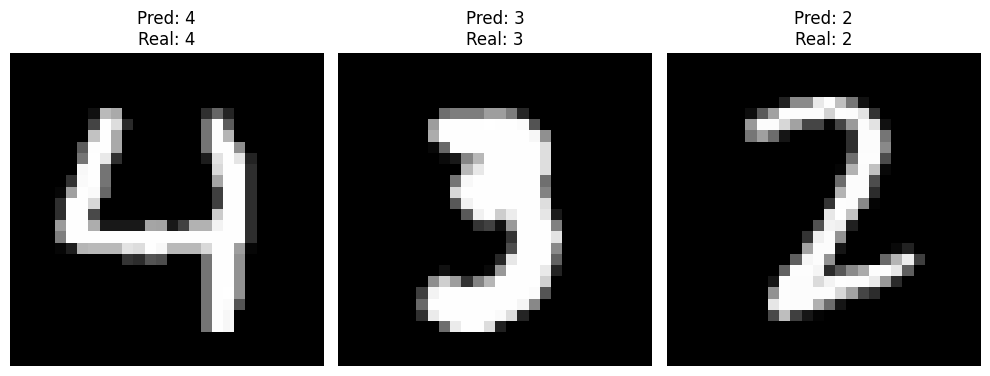

In [7]:
# Plot 3 random test images with predictions
plt.figure(figsize=(10, 4))
for i in range(3):
    idx = np.random.randint(0, len(X_test))
    plt.subplot(1, 3, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    pred = model.predict(X_test[idx].reshape(1, 784))
    plt.title(f"Pred: {np.argmax(pred)}\nReal: {y_test[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()